In [1]:
#Spleenn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sc
import csv
from random import sample 

# Visualización de datos

In [2]:
def crear(a,b,c):
    gene_names = pd.read_csv(a, delimiter="\t",header=None).iloc[:,1]
    barcodes = pd.read_csv(b, delimiter="\t",header=None).iloc[:,0]
    mat = sc.mmread(c)
    df=pd.DataFrame(mat.todense(),columns=barcodes,index=gene_names)
    return(df)

In [3]:
#CARGAMOS DATA SET DROPLET
df=crear("DROPLET/Spleen/genes.tsv","DROPLET/Spleen/barcodes.tsv","DROPLET/Spleen/matrix.mtx")

In [4]:
#CARGAMOS DATA SET FACS
Df=pd.read_csv("FACS/Spleen-counts.csv",index_col=0)

In [15]:
print(np.shape(df))
print(np.shape(Df))

(23433, 6115)
(23433, 1718)


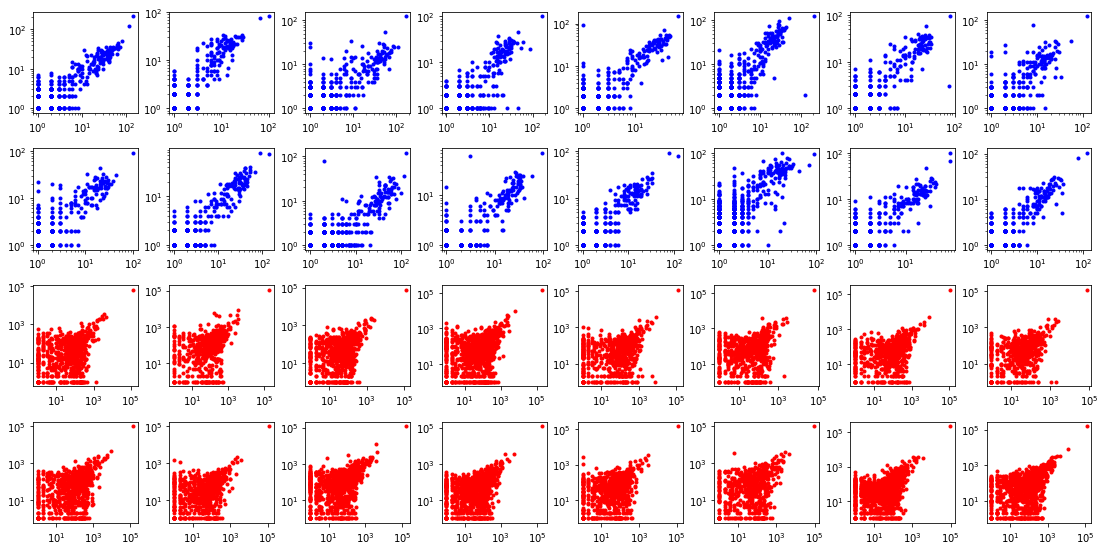

In [5]:
#nivel de expresion de los genes de una célula frente a otra: FACS=rojo, DROPLET=azul
plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35,wspace=0.3)
for i in np.arange(0,16):
    plt.subplot(5,8, i+1)
    plt.plot((df.iloc[:,i]),(df.iloc[:,i+5]),'.',c='b', linewidth=1)
    plt.yscale('log')
    plt.xscale('log')
for i in np.arange(16,32):
    plt.subplot(5,8, i+1)
    plt.plot((Df.iloc[:,i]),(Df.iloc[:,i+5]),'.',c='r', linewidth=1)
    plt.yscale('log')
    plt.xscale('log')

## Número total de lecturas

In [7]:
def lecturas(df,col):
    #total de lecturas de cada célula
    total=df.apply(sum,0)
    #número de lecturas total de cada célula
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.hist((total),bins=100, alpha=1, color=col, edgecolor = 'black',  linewidth=1)
    plt.grid()
    plt.xlim(0,max(total))
    plt.title(u"Nº de lecturas por célula de bazo (FACS)")
    plt.xlabel("Nº de lecturas")
    plt.ylabel("Frecuencia")
    plt.subplot(1,2,2)
    plt.hist(np.log(total),bins=100, color=col, alpha=1, edgecolor = 'black',  linewidth=1)
    plt.grid()
    plt.ylabel("Frecuencia")
    plt.title(u"Nº de lecturas por célula de bazo (FACS)")
    plt.xlabel("log(Nº de lecturas)")
    return(total)

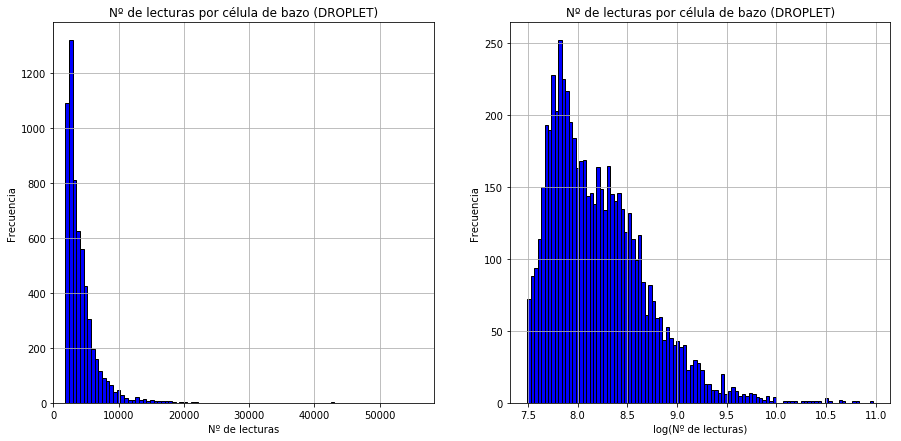

In [6]:
#DROPLET
total=lecturas(df,'blue')

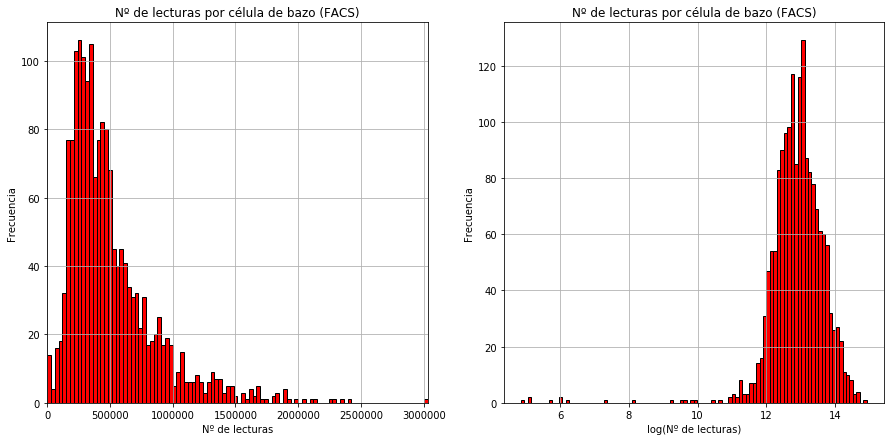

In [8]:
#FACS
Total=lecturas(Df,'red')

In [11]:
print(np.mean(total))
print(np.mean(Total))

4217.872771872445
505988.0133876601


## Expresión de los genes

* Porcentaje de genes que NUNCA se expresa, es decir, genes que tienen 0 lecturas en todas las células

In [9]:
sum_genes=df.apply(sum,1)
Sum_genes=Df.apply(sum,1)

print("DROPLET: Número de genes con 0 lecturas en todas las células:",len(sum_genes[(sum_genes==0)]), ",es decir, el ",100*len(sum_genes[(sum_genes==0)])/len(sum_genes), "%" )
print("FACS: Número de genes con 0 lecturas en todas las células:",len(Sum_genes[(Sum_genes==0)]), ",es decir, el ",100*len(Sum_genes[(Sum_genes==0)])/len(Sum_genes), "%" )

DROPLET: Número de genes con 0 lecturas en todas las células: 8606 ,es decir, el  36.725984722400035 %
FACS: Número de genes con 0 lecturas en todas las células: 5133 ,es decir, el  21.905005761106132 %


* Número de genes que se expresa (Nº de lecturas > 0) en cada célula

In [10]:
#DROPLET
df_genes=df*1
df_genes[df_genes==0]=np.nan
num_genes=df_genes.count()
#FACS
Df_genes=Df*1
Df_genes[Df_genes==0]=np.nan
Num_genes=Df_genes.count()

Text(0.5,0,'Nº total de lecturas ')

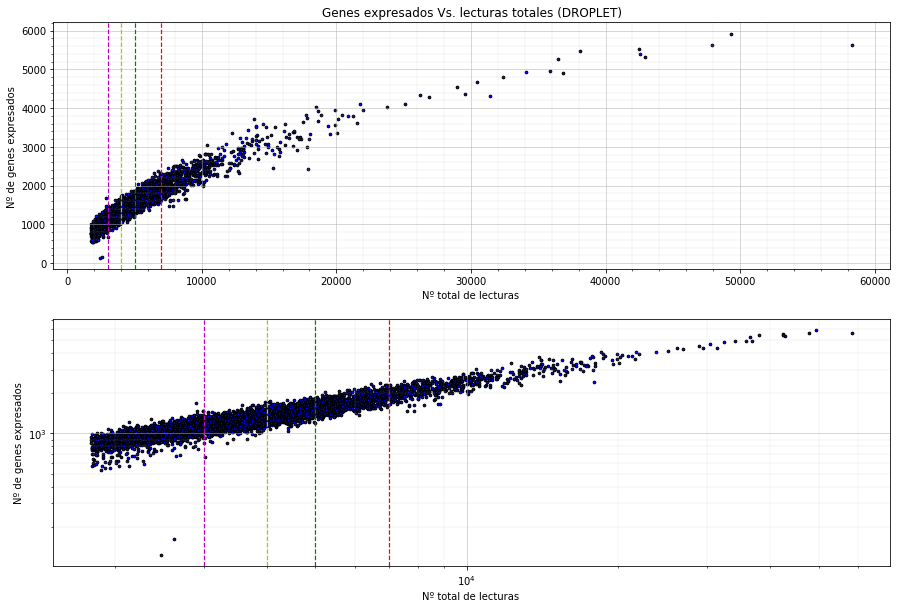

In [12]:
#DROPLET
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(total,num_genes, alpha=1, color='blue',edgecolor = 'black', s=7, linewidth=1)
plt.minorticks_on()  # Pedimos que se vean subrrayas de división en los ejes
plt.axvline(7000, color = 'r', linestyle='--', linewidth=1.2) 
plt.axvline(5000, color = 'g',linestyle='--', linewidth=1.2)
plt.axvline(4000, color = 'y',linestyle='--', linewidth=1.2)
plt.axvline(3000, color = 'm',linestyle='--', linewidth=1.2)
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.ylabel("Nº de genes expresados")
plt.title("Genes expresados Vs. lecturas totales (DROPLET)")
plt.xlabel("Nº total de lecturas ")
plt.subplot(2,1,2)
plt.scatter(total,num_genes, alpha=1, color='blue',edgecolor = 'black', s=7, linewidth=1)
plt.minorticks_on()  # Pedimos que se vean subrrayas de división en los ejes
plt.axvline(7000, color = 'r', linestyle='--', linewidth=1.2) 
plt.axvline(5000, color = 'g',linestyle='--', linewidth=1.2)
plt.axvline(4000, color = 'y',linestyle='--', linewidth=1.2)
plt.axvline(3000, color = 'm',linestyle='--', linewidth=1.2)
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.ylabel("Nº de genes expresados")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nº total de lecturas ")

In [13]:
print("Número de células con más de 3000 lecturas:",len(total[(total>=3000)]), ",es decir, el ",100*len(total[(total>=3000)])/len(total), "%" )
print("Número de células con más de 4000 lecturas:",len(total[(total>=4000)]), ",es decir, el ",100*len(total[(total>=4000)])/len(total), "%" )
print("Número de células con más de 5000 lecturas:",len(total[(total>=5000)]), ",es decir, el ",100*len(total[(total>=5000)])/len(total), "%" )
print("Número de células con más de 7000 lecturas:",len(total[(total>=7000)]), ",es decir, el ",100*len(total[(total>=7000)])/len(total), "%" )

Número de células con más de 3000 lecturas: 3592 ,es decir, el  58.74080130825838 %
Número de células con más de 4000 lecturas: 2334 ,es decir, el  38.168438266557644 %
Número de células con más de 5000 lecturas: 1427 ,es decir, el  23.336058871627145 %
Número de células con más de 7000 lecturas: 604 ,es decir, el  9.877350776778414 %


Text(0.5,0,'Nº total de lecturas ')

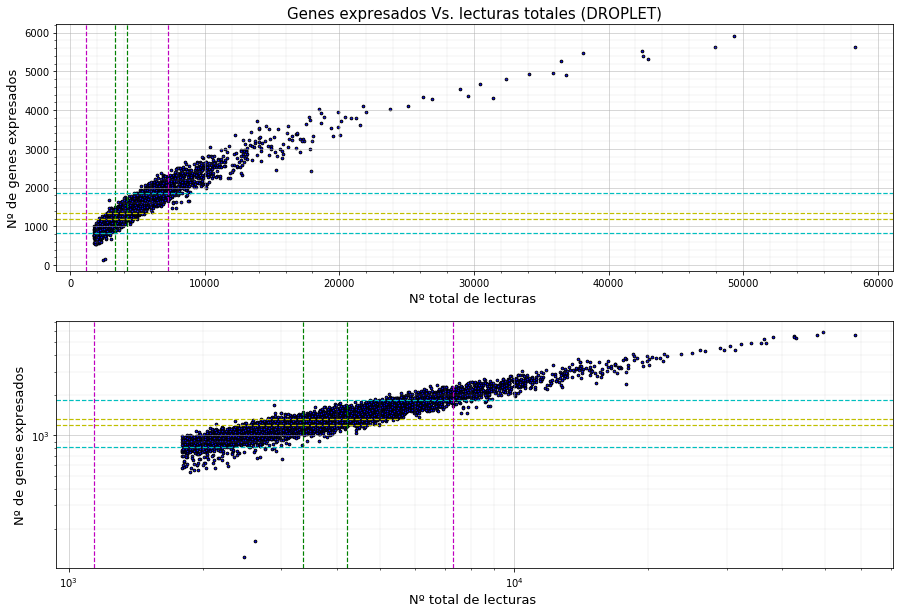

In [14]:
#DROPLET
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(total,num_genes, alpha=1, color='blue',edgecolor = 'black', s=7, linewidth=1)
plt.minorticks_on()  # Pedimos que se vean subrrayas de división en los ejes
# plt.axvline(7000, color = 'r', linestyle='--', linewidth=1.2) 
plt.axvline(np.mean(total), color = 'g',linestyle='--', linewidth=1.2)
plt.axvline(np.median(total), color = 'g',linestyle='--', linewidth=1.2)
plt.axhline(np.mean(num_genes)+np.std(num_genes), color = 'c',linestyle='--', linewidth=1.2)
plt.axhline(np.mean(num_genes)-np.std(num_genes), color = 'c',linestyle='--', linewidth=1.2)
plt.axvline(np.mean(total)+np.std(total), color = 'm',linestyle='--', linewidth=1.2)
plt.axvline(np.mean(total)-np.std(total), color = 'm',linestyle='--', linewidth=1.2)
plt.axhline(np.mean(num_genes), color = 'y',linestyle='--', linewidth=1.2)
plt.axhline(np.median(num_genes), color = 'y',linestyle='--', linewidth=1.2)
# plt.xscale('log')
# plt.yscale('log')
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.ylabel("Nº de genes expresados",fontsize=13)
plt.title("Genes expresados Vs. lecturas totales (DROPLET)",fontsize=15)
plt.xlabel("Nº total de lecturas ",fontsize=13)
plt.subplot(2,1,2)
plt.scatter(total,num_genes, alpha=1, color='blue',edgecolor = 'black', s=7, linewidth=1)
plt.minorticks_on()  # Pedimos que se vean subrrayas de división en los ejes
plt.axhline(np.mean(num_genes)+np.std(num_genes), color = 'c',linestyle='--', linewidth=1.2)
plt.axhline(np.mean(num_genes)-np.std(num_genes), color = 'c',linestyle='--', linewidth=1.2)
plt.axhline(np.mean(num_genes), color = 'y',linestyle='--', linewidth=1.2)
plt.axhline(np.median(num_genes), color = 'y',linestyle='--', linewidth=1.2)
plt.axvline(np.mean(total), color = 'g',linestyle='--', linewidth=1.2)
plt.axvline(np.median(total), color = 'g',linestyle='--', linewidth=1.2)
# plt.axvline(4000, color = 'c',linestyle='--', linewidth=1.2)
plt.axvline(np.mean(total)+np.std(total), color = 'm',linestyle='--', linewidth=1.2)
plt.axvline(np.mean(total)-np.std(total), color = 'm',linestyle='--', linewidth=1.2)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.ylabel("Nº de genes expresados",fontsize=13)
# plt.title("Genes expresados Vs. lecturas totales (DROPLET)")
plt.xlabel("Nº total de lecturas ", fontsize=13)

Text(0.5,0,'Nº total de lecturas ')

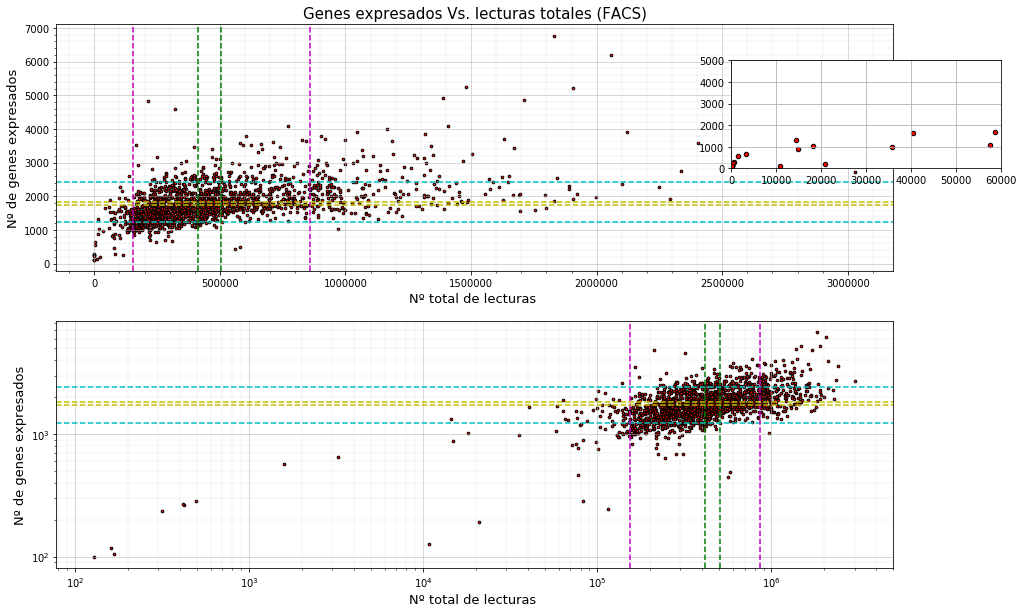

In [15]:
# Número de genes que se expresan en función del número de lecturas total para cada célula
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(Total,Num_genes, alpha=1,color='red', edgecolor = 'black', s=7,  linewidth=1)
plt.grid()

# plt.xscale('log')
plt.minorticks_on()  # Pedimos que se vean subrrayas de división en los ejes
plt.axvline(np.mean(Total), color = 'g',linestyle='--', linewidth=1.5)
plt.axvline(np.median(Total), color = 'g',linestyle='--', linewidth=1.5)
plt.axhline(np.mean(Num_genes)+np.std(Num_genes), color = 'c',linestyle='--', linewidth=1.5)
plt.axhline(np.mean(Num_genes)-np.std(Num_genes), color = 'c',linestyle='--', linewidth=1.5)
plt.axvline(np.mean(Total)+np.std(Total), color = 'm',linestyle='--', linewidth=1.5)
plt.axvline(np.mean(Total)-np.std(Total), color = 'm',linestyle='--', linewidth=1.5)
plt.axhline(np.mean(Num_genes), color = 'y',linestyle='--', linewidth=1.5)
plt.axhline(np.median(Num_genes), color = 'y',linestyle='--', linewidth=1.5)
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.ylabel("Nº de genes expresados",fontsize=13)
plt.title("Genes expresados Vs. lecturas totales (FACS)",fontsize=15)
plt.xlabel("Nº total de lecturas ",fontsize=13)
plt.axes([0.75,0.68,0.25,0.15])  # Dibuja una nueva área de gráfica colocada y con ancho y largo definido por [0.2,0.55,0.3,0.3] y con gris como color de fondo
plt.scatter(Total,Num_genes, alpha=1,color='red', edgecolor = 'black', s=20,  linewidth=1)
plt.grid()

plt.ylim(0,5000)
plt.xlim(0,60000)
plt.subplot(2,1,2)

plt.scatter(Total,Num_genes, alpha=1,color='red', edgecolor = 'black', s=7,  linewidth=1)
plt.grid()
plt.axvline(np.mean(Total), color = 'g',linestyle='--', linewidth=1.5)
plt.axvline(np.median(Total), color = 'g',linestyle='--', linewidth=1.5)
plt.axhline(np.mean(Num_genes)+np.std(Num_genes), color = 'c',linestyle='--', linewidth=1.5)
plt.axhline(np.mean(Num_genes)-np.std(Num_genes), color = 'c',linestyle='--', linewidth=1.5)
plt.axvline(np.mean(Total)+np.std(Total), color = 'm',linestyle='--', linewidth=1.5)
plt.axvline(np.mean(Total)-np.std(Total), color = 'm',linestyle='--', linewidth=1.5)
plt.axhline(np.mean(Num_genes), color = 'y',linestyle='--', linewidth=1.5)
plt.axhline(np.median(Num_genes), color = 'y',linestyle='--', linewidth=1.5)

plt.xscale('log')
plt.yscale('log')
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.ylabel("Nº de genes expresados", fontsize=13)
plt.xlabel("Nº total de lecturas ",fontsize=13)


· Curvas de rarefacción célula a célula

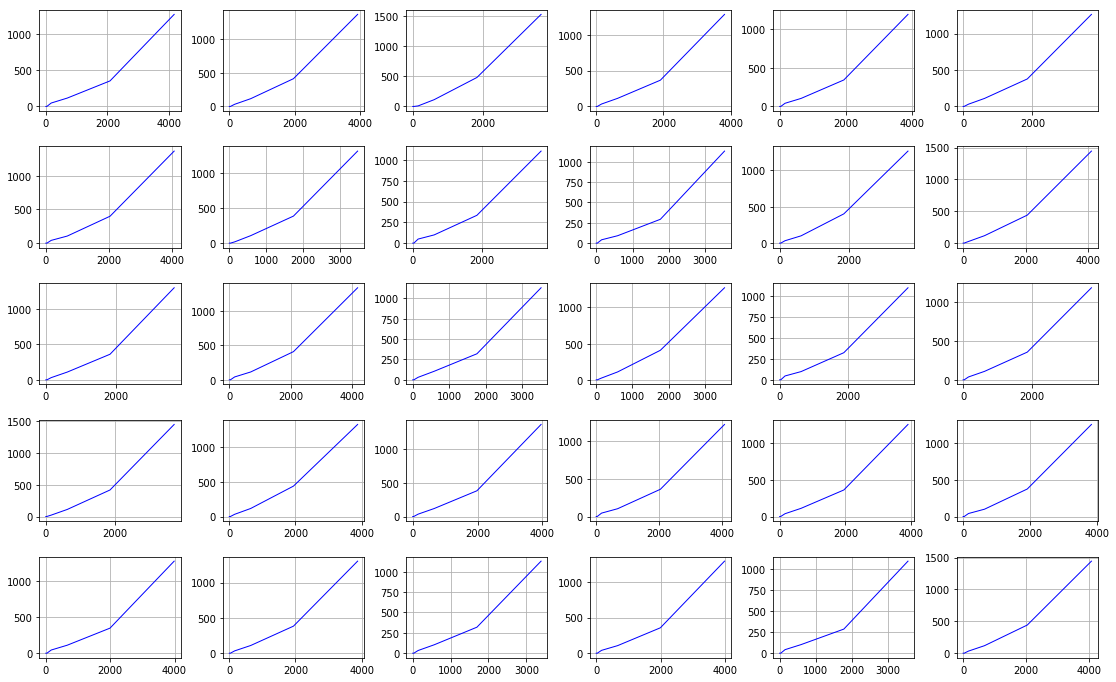

In [21]:
#DROPLET 
#Con datos entre la media y la mediana
#eje x número de lecturas total (vamos dividiendolo por 1,2,3,4...)
#eje y número de genes que se expresan
plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35,wspace=0.3)
pendiente=[]
for i in np.arange(0,30):
    cel=df_selec3.iloc[:,i*10]
    g1=[]
    lecturas=[]
    for j in np.arange(10)+1:
        cel=cel/j
        lecturas.append(sum(cel))
        g1.append(len(cel[cel>=1]))
    
    plt.subplot(5,6, i+1)
    plt.grid()
    plt.plot(lecturas,g1,'-',c='b', linewidth=1)
    pendiente.append(max(g1)/max(lecturas))

In [22]:
print("La pendiente media es:",np.mean(pendiente))

La pendiente media es: 0.33486210626515117


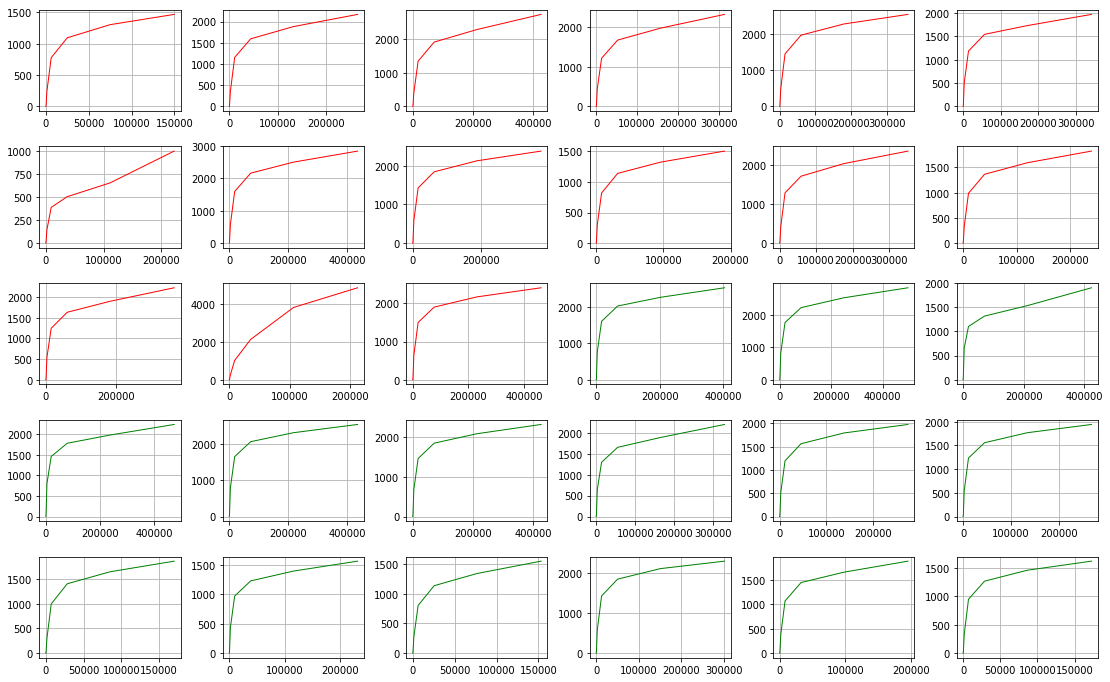

In [76]:
#FACS

#tenemos dos grupos
fdf1=Df.iloc[:,Entropias.values<=5]*1
fdf2=Df.iloc[:,Entropias.values>5]*1

plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35,wspace=0.3)
for i in np.arange(0,15):
    cel=fdf1.iloc[:,i]
    g1=[]
    lecturas=[]
    for j in np.arange(10)+1:
        cel=cel/j
        lecturas.append(sum(cel))
        g1.append(len(cel[cel>=1]))
    
    plt.subplot(5,6, i+1)
    plt.grid()
    plt.plot(lecturas,g1,'-',c='r', linewidth=1)
for i in np.arange(0,15):
    cel=fdf2.iloc[:,i]
    g1=[]
    lecturas=[]
    for j in np.arange(10)+1:
        cel=cel/j
        lecturas.append(sum(cel))
        g1.append(len(cel[cel>=1]))
    
    plt.subplot(5,6, i+16)
    plt.grid()
    plt.plot(lecturas,g1,'-',c='green', linewidth=1)

## Abundancias relativas

In [16]:
#DROPLET
#data set con abundancias relativas
df2=df.iloc[:,:]/total
#añadimos columna con la media de la abundancia de cada gen
df2['media']=df2.apply(np.mean, 1)
#15 genes con mayor media de nivel de expresión
df2=df2.sort_values(by='media', ascending=False)


#FACS
#data set con abundancias relativas
Df2=Df.iloc[:,:]/Total
#añadimos columna con la media de la abundancia de cada gen
Df2['media']=Df2.apply(np.mean, 1)
#5 genes con mayor media de nivel de expresión
Df2=Df2.sort_values(by='media', ascending=False)

In [17]:
abundancias=pd.concat([df2['media'], Df2['media']],axis=1)
abundancias.columns=['DROPLET','FACS']

C:\Users\Andrea\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
#genes más abundantes ordenador por FACS
abundancias.sort_values(by='FACS',ascending=False).head(15)

,DROPLET,FACS
Rn45s,0.001285,0.197985
Actb,0.004953,0.015916
Cd74,0.019065,0.013529
ERCC-00096,0.000000,0.012821
H2-Ab1,0.004377,0.009943
Malat1,0.032354,0.008977
ERCC-00002,0.000000,0.008971
ERCC-00130,0.000000,0.008291
H2-Aa,0.004380,0.007819
Eef1a1,0.007462,0.007809


In [19]:
#genes más abundantes ordenador por DROPLET
abundancias.sort_values(by='DROPLET',ascending=False).head(15)

,DROPLET,FACS
Malat1,0.032354,0.008977
Cd74,0.019065,0.013529
Tmsb4x,0.014219,0.003882
Rpl13,0.010231,0.001921
Rpl13a,0.010120,0.000767
Rpl18a,0.010061,0.003098
Rps19,0.009202,0.001428
Rps24,0.008774,0.000647
Fau,0.008429,0.000466
Uba52,0.008223,0.000386


        Droplet      FACS
Rn45s  0.001285  0.197985
         Droplet      FACS
Malat1  0.032354  0.008977


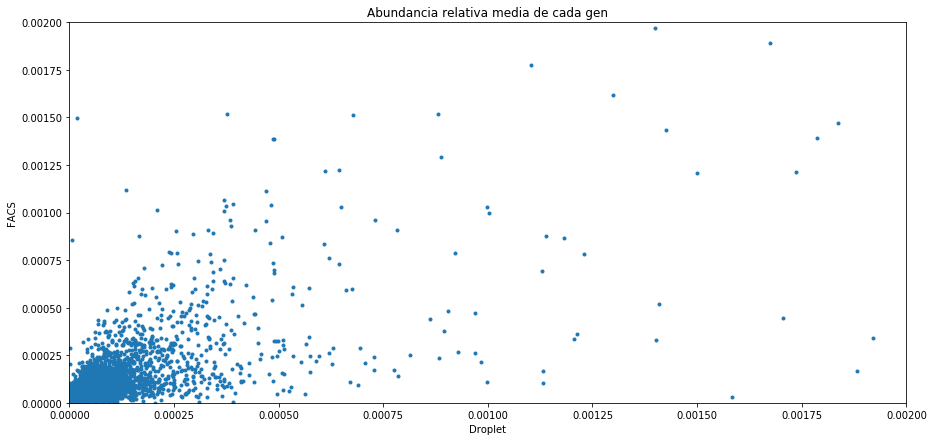

In [17]:
#Pasamos los genes ERCC de FACS a 0 porque los introduce el método
abundancias2=abundancias*1
abundancias2.loc['ERCC-00002':'ERCC-00171','FACS']=0
plt.figure(figsize=(15,7))
plt.plot(abundancias2.loc[:,'DROPLET'],abundancias2.loc[:,'FACS'],'.')
plt.xlabel('DROPLET')
plt.ylabel('FACS')
plt.title(u'Abundancia relativa media de cada gen')
plt.ylim(0,0.0020)
plt.xlim(0,0.0020)
print(abundancias2[abundancias2.FACS==np.max(abundancias.FACS)])
print(abundancias2[abundancias2.DROPLET==np.max(abundancias.DROPLET)])


In [18]:
DROPLET_ceros=(abundancias2[abundancias2.DROPLET==0])
FACS_ceros=(abundancias2[abundancias2.FACS==0])

print('Nº de genes que no se expresan en DROPLET:', np.shape(DROPLET_ceros)[0], ', es decir,', 100*np.shape(DROPLET_ceros)[0]/np.shape(abundancias)[0], "%" )
print('Nº de genes que no se expresan en FACS, habiendo quitado ERCC:', np.shape(FACS_ceros)[0],',es decir,', 100*np.shape(FACS_ceros)[0]/np.shape(abundancias)[0], "%" )
print('Nº de genes que no se expresan en DROPLET ni en FACS:', len(DROPLET_ceros[DROPLET_ceros.FACS==0]),',es decir,', 100*len(DROPLET_ceros[DROPLET_ceros.FACS==0])/np.shape(abundancias)[0], "% (ceros reales)")
print('Nº de genes "Cero-inflados" en DROPLET:', np.shape(DROPLET_ceros)[0]-len(DROPLET_ceros[DROPLET_ceros.FACS==0]),',es decir,', 100*(np.shape(DROPLET_ceros)[0]-len(DROPLET_ceros[DROPLET_ceros.FACS==0]))/np.shape(abundancias)[0], "%" )
print('Nº de genes "Cero-inflados" en FACS:', np.shape(FACS_ceros)[0]-len(DROPLET_ceros[DROPLET_ceros.FACS==0]),',es decir,', 100*(np.shape(FACS_ceros)[0]-len(DROPLET_ceros[DROPLET_ceros.FACS==0]))/np.shape(abundancias)[0], "%" )

Nº de genes que no se expresan en DROPLET: 8606 , es decir, 36.725984722400035 %
Nº de genes que no se expresan en FACS, habiendo quitado ERCC: 5209 ,es decir, 22.22933469892886 %
Nº de genes que no se expresan en DROPLET ni en FACS: 4926 ,es decir, 21.021636154141596 % (ceros reales)
Nº de genes "Cero-inflados" en DROPLET: 3680 ,es decir, 15.704348568258439 %
Nº de genes "Cero-inflados" en FACS: 283 ,es decir, 1.207698544787266 %


In [20]:
abundancias2.sort_values(by='DROPLET',ascending=False).head(15)

NameError: name 'abundancias2' is not defined

In [ ]:
abundancias2.sort_values(by='FACS',ascending=False).head(15)

## Entropía

In [21]:
def entropia(x):
        E=np.sum(-(x)*np.log(x))
        return(E)

In [22]:
df2[df2==0]=0.00000000000001
Df2[Df2==0]=0.00000000000001

#DROPLET
entropias=df2.apply(entropia,0)
entropias=entropias[0:len(entropias)-1]

#FACS
Entropias=Df2.apply(entropia,0)
Entropias=Entropias[0:len(Entropias)-1]

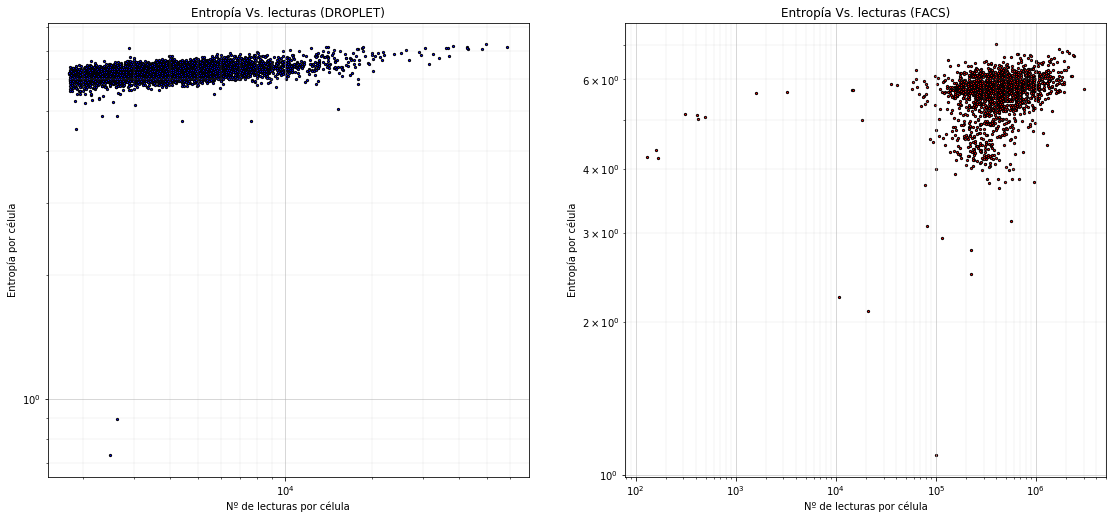

In [23]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35,wspace=0.2)
plt.subplot(1,2,1)
plt.scatter(total,entropias, alpha=1,color='blue', edgecolor = 'black', s=5,  linewidth=1)
plt.title(u"Entropía Vs. lecturas (DROPLET)")
plt.xlabel("Nº de lecturas por célula")
plt.ylabel("Entropía por célula")
plt.xscale("log")
plt.yscale("log")
plt.minorticks_on()  
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)
plt.subplot(1,2,2)
plt.scatter(Total,Entropias, alpha=1,color='red', edgecolor = 'black', s=5,  linewidth=1)
plt.title(u"Entropía Vs. lecturas (FACS)" )
plt.xlabel("Nº de lecturas por célula")
plt.ylabel("Entropía por célula")
plt.xscale("log")
plt.yscale("log")
plt.minorticks_on()  
plt.grid(which='major',linewidth=1, alpha=0.5)
plt.grid(which='minor', linewidth=0.3, alpha=0.5)


# SELECCIÓN DROPLET

### Selección de células en función de número de genes

In [13]:
print(np.mean(num_genes))
print(np.std(num_genes))
print(max(num_genes))
print(min(num_genes))

1337.8050695012264
512.8843448663343
5921
124


In [112]:
seleccion=num_genes[num_genes>(np.mean(num_genes)-(np.std(num_genes)))]
seleccion=seleccion[seleccion<(np.mean(num_genes)+np.std(num_genes))]
len(seleccion)

5142

In [141]:
df_selec=df[seleccion.index]
ind=sample(set(np.arange(len(seleccion.index))),400)
df_selec=df_selec.iloc[:,ind]
df_selec=df_selec.transpose()

In [142]:
df_selec['etiqueta']='bazo'
df_selec.to_csv('bazo_g.csv', header=True, index=True)

## Seleccion de células en función del número de lecturas

In [15]:
print(np.mean(total))
print(np.median(total))
print(np.std(total))
print(max(total))
print(min(total))

4217.872771872445
3363.0
3075.5855412835613
58330
1795


In [44]:
seleccion2=total[total>(np.mean(total)-(np.std(total)))]
seleccion2=seleccion2[seleccion2<(np.mean(total)+np.std(total))]
len(seleccion2)

5564

In [45]:
df_selec2=df[seleccion2.index]
ind2=sample(set(np.arange(len(seleccion2.index))),400)
df_selec2=df_selec2.iloc[:,ind2]
df_selec2=df_selec2.transpose()

In [46]:
df_selec2['etiqueta']=1
df_selec2.to_csv('bazo_r.csv', header=True, index=True)

· Nos quedamos entre la mediana y la media

In [9]:
seleccion3=total[total<=(np.mean(total))]
seleccion3=seleccion3[seleccion3>=np.median(total)]
len(seleccion3)

976

In [10]:
df_selec3=df[seleccion3.index]
ind3=sample(set(np.arange(len(seleccion3.index))),400)
df_selec3=df_selec3.iloc[:,ind3]
# df_selec3=df_selec3.transpose()

In [49]:
df_selec3['etiqueta']=1
df_selec3.to_csv('bazo_r2.csv', header=True, index=True)

# SELECCIÓN FACS

## Seleccion de células en función del número de genes

· Media +- desviación estándar

In [10]:
Seleccion=Num_genes[Num_genes>(np.mean(Num_genes)-(np.std(Num_genes)))]
Seleccion=Seleccion[Seleccion<(np.mean(Num_genes)+np.std(Num_genes))]
len(Seleccion)

1320

In [11]:
Df_selec=Df[Seleccion.index]
Ind=sample(set(np.arange(len(Seleccion.index))),400)
Df_selec=Df_selec.iloc[:,Ind]
Df_selec=Df_selec.transpose()

In [12]:
Df_selec['etiqueta']=1
Df_selec.to_csv('bazo_g_FACS.csv', header=True, index=True)

## Seleccion de células en función del número de lecturas

· Media +- desviación estándar

In [7]:
Seleccion2=Total[Total>(np.mean(Total)-(np.std(Total)))]
Seleccion2=Seleccion2[Seleccion2<=(np.mean(Total)+(np.std(Total)))]
len(Seleccion2)

1397

In [8]:
Df_selec2=Df[Seleccion2.index]
Ind2=sample(set(np.arange(len(Seleccion2.index))),400)
Df_selec2=Df_selec2.iloc[:,Ind2]
Df_selec2=Df_selec2.transpose()

In [9]:
Df_selec2['etiqueta']=1
Df_selec2.to_csv('bazo_r_FACS.csv', header=True, index=True)

· Media-mediana

In [9]:
Seleccion3=Total[Total<=(np.mean(Total)+50000)]
Seleccion3=Seleccion3[Seleccion3>=np.median(Total)-50000]
len(Seleccion3)

429

In [10]:
Df_selec3=Df[Seleccion3.index]
Ind3=sample(set(np.arange(len(Seleccion3.index))),400)
Df_selec3=Df_selec3.iloc[:,Ind3]
Df_selec3=Df_selec3.transpose()

In [11]:
Df_selec3['etiqueta']=1
Df_selec3.to_csv('bazo_r2_FACS.csv', header=True, index=True)